In [1]:
import sys 
sys.path.append('..')

In [2]:
import pandas as pd
from os import listdir
from os.path import isfile, join
from utils.functions import dropna_pearsonr, dropna_spearmanr

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
path = '../input/climate/real+grid'
files = [f.split('.')[0] for f in listdir(path) if isfile(join(path, f))]

data = dict()
for f in files:
    data[f] = pd.read_csv(f'{path}/{f}.csv')

data['DP_Inuvik'] = pd.read_csv('../input/climate/real/dew point temperature/DewPointTemp_Inuvik.csv')

In [4]:
COH = pd.read_excel('../input/CAN_COH_221121.xlsx')
COH = COH.rename(columns={'d13C':'C', 'd18O':'O', 'dH':'H'})

In [6]:
data.keys()

dict_keys(['Prec_Chokurdakh', 'Prec_Inuvik', 'Prec_Khatanga', 'Temp_Chokurdakh', 'Temp_Inuvik', 'Temp_Khatanga', 'VPD_Chokurdakh', 'VPD_Inuvik', 'VPD_Khatanga'])

# Correlations

In [6]:
print('C/H r = {0:.2f}, p = {1:.4f}'.format(*dropna_spearmanr(COH['C'], COH['H'])))
print('C/O r = {0:.2f}, p = {1:.4f}'.format(*dropna_spearmanr(COH['C'], COH['O'])))
print('O/H r = {0:.2f}, p = {1:.4f}'.format(*dropna_spearmanr(COH['O'], COH['H'])))

C/H r = -0.14, p = 0.1353
C/O r = -0.11, p = 0.2662
O/H r = 0.08, p = 0.4358


In [5]:
print('C/H r = {0:.2f}, p = {1:.4f}'.format(*dropna_pearsonr(COH['C'], COH['H'])))
print('C/O r = {0:.2f}, p = {1:.4f}'.format(*dropna_pearsonr(COH['C'], COH['O'])))
print('O/H r = {0:.2f}, p = {1:.4f}'.format(*dropna_pearsonr(COH['O'], COH['H'])))

C/H r = -0.13, p = 0.1608
C/O r = -0.09, p = 0.3740
O/H r = 0.14, p = 0.1484


In [6]:
CAN_COH_prec = COH.merge(data['Prec_Inuvik'], on='Year', how='left')
CAN_COH_temp = COH.merge(data['Temp_Inuvik'], on='Year', how='left')
CAN_COH_vpd = COH.merge(data['VPD_Inuvik'], on='Year', how='left')
CAN_COH_rh = COH.merge(data['DP_Inuvik'], on='Year', how='left')

In [7]:
CAN_COH_corr = {
    'Month' : [],
    'Temp\C': [],
    'Temp\O': [],
    'Temp\H': [],
    'Prec\C': [],
    'Prec\O': [],
    'Prec\H': [],
    'VPD\C' : [],
    'VPD\O' : [],
    'VPD\H' : [],
    'RH\C' : [],
    'RH\O' : [],
    'RH\H' : [],
}
montshs = []
for col in data['Prec_Inuvik'].columns:
    if col == 'Year':
        continue
    CAN_COH_corr['Month'] += [col]
    CAN_COH_corr['Temp\C'] += ['{0:.2f}\np={1:.4f}'.format(*dropna_pearsonr(CAN_COH_temp['C'], CAN_COH_temp[col]))]
    CAN_COH_corr['Temp\O'] += ['{0:.2f}\np={1:.4f}'.format(*dropna_pearsonr(CAN_COH_temp['O'], CAN_COH_temp[col]))]
    CAN_COH_corr['Temp\H'] += ['{0:.2f}\np={1:.4f}'.format(*dropna_pearsonr(CAN_COH_temp['H'], CAN_COH_temp[col]))]
    CAN_COH_corr['Prec\C'] += ['{0:.2f}\np={1:.4f}'.format(*dropna_pearsonr(CAN_COH_prec['C'], CAN_COH_prec[col]))]
    CAN_COH_corr['Prec\O'] += ['{0:.2f}\np={1:.4f}'.format(*dropna_pearsonr(CAN_COH_prec['O'], CAN_COH_prec[col]))]
    CAN_COH_corr['Prec\H'] += ['{0:.2f}\np={1:.4f}'.format(*dropna_pearsonr(CAN_COH_prec['H'], CAN_COH_prec[col]))]
    CAN_COH_corr['VPD\C']  += ['{0:.2f}\np={1:.4f}'.format(*dropna_pearsonr(CAN_COH_vpd['C'], CAN_COH_vpd[col]))]
    CAN_COH_corr['VPD\O']  += ['{0:.2f}\np={1:.4f}'.format(*dropna_pearsonr(CAN_COH_vpd['O'], CAN_COH_vpd[col]))]
    CAN_COH_corr['VPD\H']  += ['{0:.2f}\np={1:.4f}'.format(*dropna_pearsonr(CAN_COH_vpd['H'], CAN_COH_vpd[col]))]
    CAN_COH_corr['RH\C']  += ['{0:.2f}\np={1:.4f}'.format(*dropna_pearsonr(CAN_COH_rh['C'], CAN_COH_rh[col]))]
    CAN_COH_corr['RH\O']  += ['{0:.2f}\np={1:.4f}'.format(*dropna_pearsonr(CAN_COH_rh['O'], CAN_COH_rh[col]))]
    CAN_COH_corr['RH\H']  += ['{0:.2f}\np={1:.4f}'.format(*dropna_pearsonr(CAN_COH_rh['H'], CAN_COH_rh[col]))]

CAN_COH_corr = pd.DataFrame(CAN_COH_corr)

In [8]:
CAN_COH_corr

,Month,Temp\C,Temp\O,Temp\H,Prec\C,Prec\O,Prec\H,VPD\C,VPD\O,VPD\H,RH\C,RH\O,RH\H
0,January,-0.16\np=0.0867,-0.01\np=0.9054,-0.03\np=0.7364,0.09\np=0.4938,-0.19\np=0.1406,0.01\np=0.9414,0.22\np=0.0188,-0.07\np=0.4475,-0.15\np=0.1270,-0.16\np=0.2724,-0.15\np=0.2990,-0.22\np=0.1169
1,February,-0.20\np=0.0410,0.14\np=0.1509,0.02\np=0.8461,0.09\np=0.4708,0.11\np=0.4121,0.04\np=0.7805,0.24\np=0.0120,0.05\np=0.6065,-0.20\np=0.0346,-0.28\np=0.0439,0.01\np=0.9216,-0.01\np=0.9305
2,March,-0.20\np=0.0400,0.20\np=0.0339,0.23\np=0.0161,0.05\np=0.6765,0.10\np=0.4349,0.03\np=0.8445,0.15\np=0.1314,-0.00\np=0.9738,-0.07\np=0.4519,0.11\np=0.4459,0.18\np=0.2021,0.29\np=0.0368
3,April,-0.29\np=0.0022,0.27\np=0.0041,0.14\np=0.1380,0.21\np=0.1032,-0.09\np=0.4611,-0.16\np=0.2160,0.20\np=0.0414,-0.04\np=0.6449,-0.15\np=0.1245,0.03\np=0.8390,0.29\np=0.0382,0.06\np=0.6571
4,May,-0.21\np=0.0249,0.24\np=0.0126,0.12\np=0.2306,0.05\np=0.6758,-0.09\np=0.4696,0.09\np=0.4662,0.38\np=0.0001,-0.07\np=0.4547,-0.23\np=0.0152,-0.02\np=0.8992,0.09\np=0.5178,0.01\np=0.9322
5,June,-0.20\np=0.0375,0.16\np=0.0976,0.03\np=0.7642,-0.18\np=0.1540,-0.21\np=0.0914,0.21\np=0.0914,0.41\np=0.0000,-0.10\np=0.2943,-0.29\np=0.0024,-0.11\np=0.4313,0.01\np=0.9591,-0.11\np=0.4627
6,July,-0.06\np=0.5626,0.05\np=0.5905,0.32\np=0.0007,-0.09\np=0.4825,-0.10\np=0.4498,0.07\np=0.5952,0.44\np=0.0000,-0.14\np=0.1607,-0.16\np=0.1045,-0.02\np=0.8689,-0.09\np=0.5305,0.22\np=0.1279
7,August,-0.22\np=0.0243,-0.05\np=0.6232,0.25\np=0.0085,0.13\np=0.3120,0.03\np=0.8379,-0.19\np=0.1291,0.38\np=0.0000,-0.16\np=0.1016,-0.16\np=0.0865,-0.18\np=0.2099,-0.15\np=0.2809,0.14\np=0.3438
8,September,-0.26\np=0.0056,0.08\np=0.4055,0.18\np=0.0655,0.03\np=0.8133,0.07\np=0.6103,0.05\np=0.7024,0.38\np=0.0001,-0.14\np=0.1337,-0.20\np=0.0390,-0.31\np=0.0270,0.11\np=0.4586,0.08\np=0.5716
9,October,-0.02\np=0.8677,0.20\np=0.0359,-0.10\np=0.3134,0.25\np=0.0482,0.04\np=0.7546,0.04\np=0.7315,0.38\np=0.0000,-0.08\np=0.4033,-0.22\np=0.0210,0.02\np=0.8664,0.16\np=0.2478,-0.28\np=0.0455


In [9]:
CAN_COH_corr.to_excel('../output/CAN_COH_corr.xlsx', index=False)

# Regression

Данные прогнать с климатикой по Инувик с сентября предыдущего по август текущего года с 1900 по 2009 для температуры воздуха, осадкам, относительной влажности, VPD.
Посмотреть климатику по усредненным месяцам июнь + июль, июнь+июль+август, март+апрель+май, апрель+май для всех параметров. Попробовать найти данные по PAR для Инувик.

In [14]:
def get_summer1_df(df, name=''):
    return df[['Year', 'June', 'July']].rename(columns={'June':f'{name}_June', 'July':f'{name}_July'})

def get_summer_df(df, name=''):
    return df[['Year', 'June', 'July', 'August']].rename(columns={'June':f'{name}_June', 'July':f'{name}_July', 'August':f'{name}_August'})

def get_spring1_df(df, name=''):
    return df[['Year', 'April', 'May']].rename(columns={ 'April':f'{name}_April', 'May':f'{name}_May'})

def get_spring_df(df, name=''):
    return df[['Year', 'March', 'April', 'May']].rename(columns={'March':f'{name}_March', 'April':f'{name}_April', 'May':f'{name}_May'})

In [16]:

CAN = COH.merge(
    get_summer_df(data['Temp_Inuvik'], 'Temp'), on='Year', how='left').merge(
        get_summer_df(data['Prec_Inuvik'], 'Prec'), on='Year', how='left').merge(
            get_summer_df(data['VPD_Inuvik'], 'VPD'), on='Year', how='left').merge(
                get_spring_df(data['Temp_Inuvik'], 'Temp'), on='Year', how='left').merge(
                    get_spring_df(data['Prec_Inuvik'], 'Prec'), on='Year', how='left').merge(
                        get_spring_df(data['VPD_Inuvik'], 'VPD'), on='Year', how='left').merge(
                            get_summer_df(data['DP_Inuvik'], 'DP'), on='Year', how='left').merge(
                                get_spring_df(data['DP_Inuvik'], 'DP'), on='Year', how='left')

In [28]:
CAN.mean(axis=1)

0      434.174520
1      110.219376
2      109.950832
3      109.553272
4      109.614815
          ...    
105     71.222231
106     70.146860
107     70.232560
108     70.273155
109     69.764098
Length: 110, dtype: float64

In [18]:
CAN.to_excel('../output/CAN_COH_regression.xlsx', index=False)

In [20]:
import matplotlib.pylab as plt
import numpy as np

from pandas import DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
#from sklearn.neural_network import MLPRegressor
from utils.functions import dropna_pearsonr
from xgboost import XGBRegressor

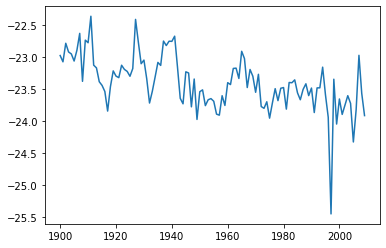

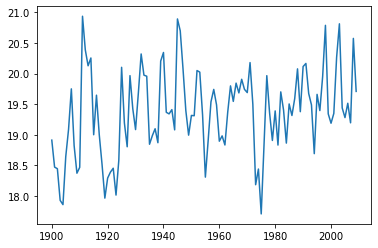

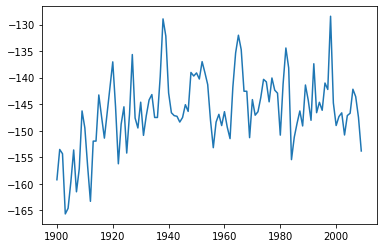

In [37]:
plt.plot(CAN['Year'], CAN['C'])
plt.show()
plt.plot(CAN['Year'], CAN['O'])
plt.show()
plt.plot(CAN['Year'], CAN['H'])
plt.show()

In [22]:
def coef_to_percent(coefs):
    _coefs = [abs(el) for el in coefs]
    return np.array([el/sum(_coefs) for el in _coefs])

def print_percent(parameters, percent):
    for par, per in zip(parameters, percent):
        print(f'{par}: {per*100:0.2f}%')

In [32]:
def train_models(trn, trg):
    models = [
        LinearRegression(), # Least squares
        RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # Random Forest
        SVR(kernel='linear'), # support-vector machines
        XGBRegressor(random_state=1) # XGBoost
    ]

    Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.2)

    TestModels = DataFrame()
    tmp = {}

    for model in models:
        m = str(model)

        m = m[:m.index('(')]
        tmp['Model'] = m
        model.fit(Xtrn, Ytrn.iloc[:,0]) 
        tmp['R2'] = r2_score(Ytest.iloc[:,0], model.predict(Xtest))
        tmp['R'] = dropna_pearsonr(Ytest.iloc[:,0], model.predict(Xtest))[0]
        tmp['P-value'] = dropna_pearsonr(Ytest.iloc[:,0], model.predict(Xtest))[1]
        
        if m == 'LinearRegression':
            importances = coef_to_percent(model.coef_)
        if m == "RandomForestRegressor":
            importances = model.feature_importances_
        if m == "SVR":
            importances = coef_to_percent(model.coef_[0])
        if m == "XGBRegressor":
            importances = model.feature_importances_
        
        plt.bar(parameters, importances*100)
        plt.ylabel('Feature importance (%)')
        plt.xlabel('Feature name')
        plt.xticks(rotation=70)
        plt.title(m)
        plt.show()
        print_percent(parameters, importances)
        TestModels = TestModels.append([tmp])
    TestModels.set_index('Model', inplace=True)
    return TestModels

In [40]:
CAN_cleared = CAN.dropna()
parameters = ['Temp_June', 'Temp_July', 'Temp_August',
       'Prec_June', 'Prec_July', 'Prec_August', 'VPD_June', 'VPD_July',
       'VPD_August', 'Temp_March', 'Temp_April', 'Temp_May', 'Prec_March',
       'Prec_April', 'Prec_May', 'VPD_March', 'VPD_April', 'VPD_May',
       'DP_June', 'DP_July', 'DP_August', 'DP_March', 'DP_April', 'DP_May']
trg = CAN_cleared[['C', 'O', 'H']]
trn = CAN_cleared.drop(['Year','C', 'O', 'H'], axis=1)

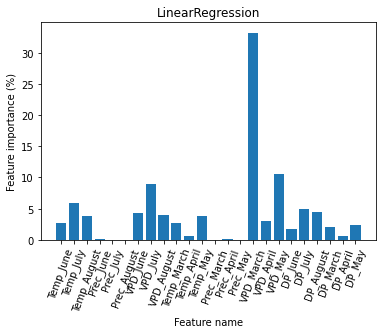

Temp_June: 2.70%
Temp_July: 5.95%
Temp_August: 3.80%
Prec_June: 0.04%
Prec_July: 0.03%
Prec_August: 0.03%
VPD_June: 4.32%
VPD_July: 9.01%
VPD_August: 3.93%
Temp_March: 2.74%
Temp_April: 0.57%
Temp_May: 3.73%
Prec_March: 0.01%
Prec_April: 0.10%
Prec_May: 0.00%
VPD_March: 33.26%
VPD_April: 2.96%
VPD_May: 10.51%
DP_June: 1.78%
DP_July: 5.00%
DP_August: 4.40%
DP_March: 2.11%
DP_April: 0.64%
DP_May: 2.39%


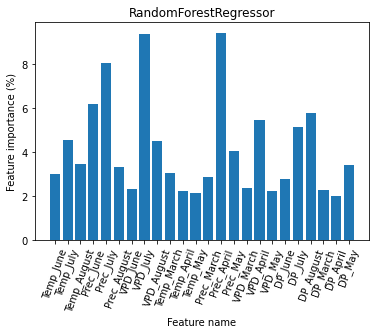

Temp_June: 2.99%
Temp_July: 4.54%
Temp_August: 3.46%
Prec_June: 6.19%
Prec_July: 8.08%
Prec_August: 3.34%
VPD_June: 2.31%
VPD_July: 9.37%
VPD_August: 4.49%
Temp_March: 3.03%
Temp_April: 2.23%
Temp_May: 2.15%
Prec_March: 2.88%
Prec_April: 9.45%
Prec_May: 4.06%
VPD_March: 2.36%
VPD_April: 5.45%
VPD_May: 2.23%
DP_June: 2.76%
DP_July: 5.16%
DP_August: 5.77%
DP_March: 2.28%
DP_April: 1.99%
DP_May: 3.43%


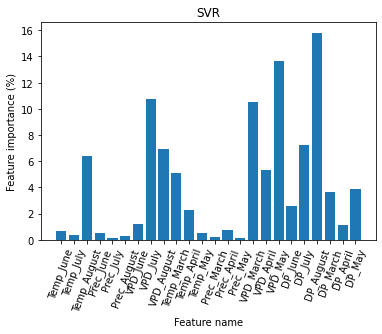

Temp_June: 0.68%
Temp_July: 0.39%
Temp_August: 6.39%
Prec_June: 0.53%
Prec_July: 0.13%
Prec_August: 0.25%
VPD_June: 1.19%
VPD_July: 10.76%
VPD_August: 6.94%
Temp_March: 5.06%
Temp_April: 2.29%
Temp_May: 0.52%
Prec_March: 0.18%
Prec_April: 0.72%
Prec_May: 0.11%
VPD_March: 10.55%
VPD_April: 5.35%
VPD_May: 13.67%
DP_June: 2.59%
DP_July: 7.23%
DP_August: 15.82%
DP_March: 3.61%
DP_April: 1.14%
DP_May: 3.88%


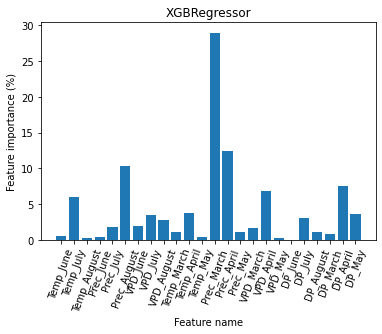

Temp_June: 0.57%
Temp_July: 5.92%
Temp_August: 0.28%
Prec_June: 0.43%
Prec_July: 1.74%
Prec_August: 10.31%
VPD_June: 1.91%
VPD_July: 3.46%
VPD_August: 2.81%
Temp_March: 1.09%
Temp_April: 3.81%
Temp_May: 0.36%
Prec_March: 28.98%
Prec_April: 12.47%
Prec_May: 1.12%
VPD_March: 1.65%
VPD_April: 6.80%
VPD_May: 0.29%
DP_June: 0.01%
DP_July: 3.06%
DP_August: 1.07%
DP_March: 0.73%
DP_April: 7.57%
DP_May: 3.58%


,R2,R,P-value
Model,,,
LinearRegression,-7.071941,0.030294,0.929544
RandomForestRegressor,-0.097991,0.168363,0.620706
SVR,-2.457863,0.174829,0.607147
XGBRegressor,0.153761,0.508563,0.110168


In [41]:
train_models(trn, trg)